Use digits mnist dataset and fashion mnist dataset to build an Artificial Neural Network (ANN) and Conventional Neural Network (CNN)

In [31]:
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
digits = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = digits.load_data()

In [33]:
X_train = X_train/255
X_test = X_test/255

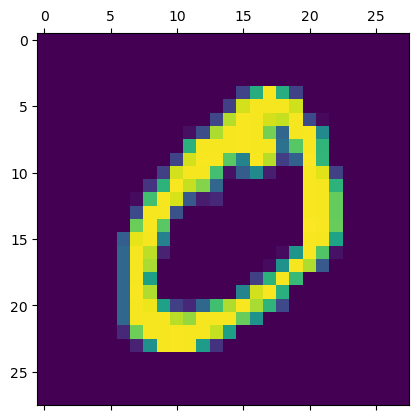

In [34]:
plt.matshow(X_train[1])

In [35]:
y_train[1]

0

In [36]:
X_test.shape

(10000, 28, 28)

# Artificial Neural Network

In [50]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28, 1)))
model.add(keras.layers.Dense(20, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [51]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 20)                15700     
                                                                 
 dense_11 (Dense)            (None, 10)                210       
                                                                 
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.compile(loss="sparse_categorical_crossentropy",           
              optimizer="adam",
              metrics=["accuracy"])

In [53]:
model.fit(X_train, y_train)

1875/1875 [==============================] - 2s 708us/step - loss: 0.4086 - accuracy: 0.8856


In [54]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 543us/step - loss: 0.2536 - accuracy: 0.9239


[0.253621906042099, 0.9239000082015991]

In [55]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_pred = [np.argmax(i) for i in y_pred]
confusion_matrix(y_test, y_pred)

313/313 [==============================] - 0s 448us/step


array([[ 963,    0,    1,    2,    4,    2,    6,    1,    1,    0],
       [   0, 1112,    2,    2,    1,    3,    4,    1,   10,    0],
       [  11,    5,  913,   17,   21,    0,   11,   15,   36,    3],
       [   3,    2,   12,  928,    6,   18,    1,   15,   14,   11],
       [   1,    2,    2,    0,  947,    0,    8,    2,    3,   17],
       [  11,    3,    1,   35,   17,  773,   17,    7,   21,    7],
       [  11,    3,    5,    1,   13,   13,  911,    0,    1,    0],
       [   2,    7,   20,    7,    9,    1,    0,  951,    3,   28],
       [   9,    7,    6,   24,   15,   31,   10,   15,  845,   12],
       [  11,    8,    1,   10,   55,    5,    1,   18,    4,  896]])

In [56]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
y_pred = [np.argmax(i) for i in y_pred]
print(classification_report(y_test, y_pred))


313/313 [==============================] - 0s 491us/step
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.97      0.98      0.97      1135
           2       0.95      0.88      0.92      1032
           3       0.90      0.92      0.91      1010
           4       0.87      0.96      0.91       982
           5       0.91      0.87      0.89       892
           6       0.94      0.95      0.95       958
           7       0.93      0.93      0.93      1028
           8       0.90      0.87      0.88       974
           9       0.92      0.89      0.90      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [57]:
np.argmax(model.predict(X_test)[0])

313/313 [==============================] - 0s 473us/step


7

In [58]:
print(y_test[0])

7


# Conventional Neural Network

In [59]:
model = keras.Sequential([
    keras.layers.Conv2D(30, (3, 3), activation = 'relu', input_shape=(28,28,1)),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])


In [60]:
model.compile(loss="sparse_categorical_crossentropy",           
              optimizer="adam",
              metrics=["accuracy"])

In [61]:
model.fit(X_train, y_train)

1875/1875 [==============================] - 9s 4ms/step - loss: 0.2311 - accuracy: 0.9320


In [62]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
y_pred = [np.argmax(i) for i in y_pred]
print(classification_report(y_test, y_pred))

313/313 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.97      0.99      0.98      1135
           2       0.97      0.96      0.97      1032
           3       0.97      0.99      0.98      1010
           4       0.97      0.99      0.98       982
           5       0.96      0.98      0.97       892
           6       0.96      0.98      0.97       958
           7       0.98      0.95      0.97      1028
           8       0.97      0.96      0.97       974
           9       0.98      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [63]:
np.argmax(model.predict(X_test)[0])

313/313 [==============================] - 0s 1ms/step


7

In [65]:
print(y_test[0])

7


Use fashion mnist dataset and fashion mnist dataset to build an Artificial Neural Network (ANN) and Conventional Neural Network (CNN)

In [66]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.10.0


In [67]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [68]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [69]:
train_images.shape

(60000, 28, 28)

In [70]:
train_labels.shape

(60000,)

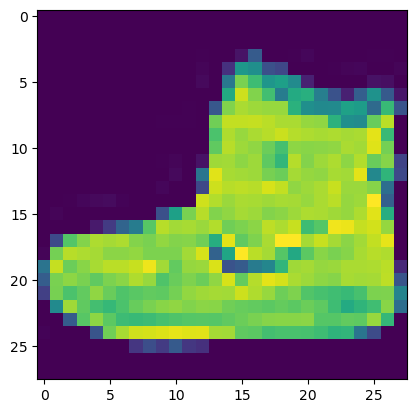

In [71]:
plt.imshow(train_images[0])

In [72]:
train_labels[0]

9

In [73]:
class_names[train_labels[0]]

'Ankle boot'

In [74]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [81]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(500, activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")
])

model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [83]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2646 - accuracy: 0.9018
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2537 - accuracy: 0.9040
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2396 - accuracy: 0.9107
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2312 - accuracy: 0.9138
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2224 - accuracy: 0.9161


In [84]:
class_names[np.argmax(model.predict(test_images)[0])]

313/313 [==============================] - 0s 1ms/step


'Ankle boot'

In [79]:
class_names[test_labels[0]]

'Ankle boot'

In [85]:
model = keras.Sequential([
    keras.layers.Conv2D(30, (3, 3), activation = 'relu', input_shape=(28,28,1)),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(500, activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")
])

model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [86]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3692 - accuracy: 0.8661
Epoch 2/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2449 - accuracy: 0.9109
Epoch 3/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1984 - accuracy: 0.9269
Epoch 4/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1636 - accuracy: 0.9397
Epoch 5/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1314 - accuracy: 0.9507


In [87]:
class_names[np.argmax(model.predict(test_images)[0])]

313/313 [==============================] - 2s 6ms/step


'Ankle boot'

In [88]:
class_names[test_labels[0]]

'Ankle boot'

Take this dataset for bank customer churn prediction : https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

i. Build a deep learning model to predict churn rate at bank. <br>
ii. Once model is built, print classification report and analyze precision, recall and f1-score <br>
iii. Improve f1 score in minority class using various techniques such as undersampling, oversampling, ensemble etc


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("Churn_Modelling.csv")
df.sample(5)

In [ ]:
df.Exited.value_counts()

In [ ]:
df_dropped = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)
df_dropped.sample(5)

In [ ]:
df_dropped.dtypes

In [ ]:
df_with_dummies = pd.get_dummies(data=df_dropped, drop_first=True)
df_with_dummies

In [ ]:
df_with_dummies.dtypes

In [ ]:
from sklearn.preprocessing import MinMaxScaler
columns_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = MinMaxScaler()
df_with_dummies[columns_to_scale] = scaler.fit_transform(df_with_dummies[columns_to_scale])
df_with_dummies

In [ ]:
from sklearn.model_selection import train_test_split
X = df_with_dummies.drop("Exited", axis=1)
y = df_with_dummies["Exited"]
X_test, X_train, y_test, y_train= train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
len(X_train.columns)

In [ ]:
def ANN(X_train, X_test, y_train, y_test):
    model= keras.Sequential([
        keras.layers.Dense(11, activation='relu', input_dim=11),
        keras.layers.Dense(5, activation='relu'),
        keras.layers.Dense(1, activation= 'sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=100)
    model.evaluate(X_test, y_test)
    y_pred= np.round(model.predict(X_test))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    return y_pred
     


In [ ]:
y_pred = ANN(X_train, X_test, y_train, y_test) 

# Undersampling

In [ ]:
new_df = pd.concat([X_train, y_train], axis=1)
new_df

In [ ]:
df_0 = new_df[new_df.Exited==0]
df_1 = new_df[new_df.Exited==1]

In [ ]:
len(df_0), len(df_1)

In [ ]:
df_0 = df_0.sample(407)
df_undersampled = pd.concat([df_0, df_1], axis=0)
df_undersampled

In [ ]:
X = df_undersampled.drop("Exited", axis=1)
y = df_undersampled["Exited"]
ANN(X, X_test,y, y_test)

In [ ]:
df_0 = new_df[new_df.Exited==0]
df_1 = new_df[new_df.Exited==1]

In [ ]:
len(df_0), len(df_1)

In [ ]:
df_1 = df_1.sample(1593, replace=True)

In [ ]:
len(df_0), len(df_1)

In [ ]:
df_oversampled = pd.concat([df_0, df_1])
df_oversampled

In [ ]:
X = df_oversampled.drop("Exited", axis=1)
y = df_oversampled["Exited"]
ANN(X, X_test,y, y_test)

# Oversample SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_train, y_train)

In [ ]:
ANN(X_sm, X_test,y_sm, y_test)

# Ensemble

In [ ]:
df_0 = new_df[new_df.Exited==0]
df_1 = new_df[new_df.Exited==1]
len(df_0), len(df_1)

In [ ]:
1593//407

In [ ]:
lst_ensemble = []
for i in range(3):
    df_ensemble = pd.concat([df_0.sample(407), df_1])
    lst_ensemble.append(df_ensemble)

In [ ]:
lst_ensemble[2]

In [ ]:
X = lst_ensemble[0].drop("Exited", axis=1)
y = lst_ensemble[0]["Exited"]
y_pred1= ANN(X, X_test,y, y_test)

In [ ]:
X = lst_ensemble[1].drop("Exited", axis=1)
y = lst_ensemble[1]["Exited"]
y_pred2 = ANN(X, X_test,y, y_test)

In [ ]:
X = lst_ensemble[2].drop("Exited", axis=1)
y = lst_ensemble[2]["Exited"]
y_pred3 = ANN(X, X_test,y, y_test)

In [ ]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred_final)):
    num = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if num >= 1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0


In [ ]:
print(classification_report(y_test, y_pred_final))

Train a word2vec model on the Amazon datasets in kaggle. Once you train a model on this, find the words most similar to 'awful' and find similarities between the following word tuples: ('good', 'great'), ('slow','steady')

In [1]:
import gensim
import pandas as pd

In [9]:
df = pd.read_csv("Reviews.csv")

In [10]:
df.head(4)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...


In [11]:
review_text= df.Text.apply(gensim.utils.simple_preprocess)

In [12]:
review_text.head(4)

0    [have, bought, several, of, the, vitality, can...
1    [product, arrived, labeled, as, jumbo, salted,...
2    [this, is, confection, that, has, been, around...
3    [if, you, are, looking, for, the, secret, ingr...
Name: Text, dtype: object

In [16]:
review_text.loc[0,]

['have',
 'bought',
 'several',
 'of',
 'the',
 'vitality',
 'canned',
 'dog',
 'food',
 'products',
 'and',
 'have',
 'found',
 'them',
 'all',
 'to',
 'be',
 'of',
 'good',
 'quality',
 'the',
 'product',
 'looks',
 'more',
 'like',
 'stew',
 'than',
 'processed',
 'meat',
 'and',
 'it',
 'smells',
 'better',
 'my',
 'labrador',
 'is',
 'finicky',
 'and',
 'she',
 'appreciates',
 'this',
 'product',
 'better',
 'than',
 'most']

In [18]:
model = gensim.models.Word2Vec(
    window=10,
    min_count=2,
    workers=8
)

In [20]:
model.build_vocab(review_text)

In [21]:
model.train(review_text, total_examples=model.corpus_count, epochs=model.epochs)


(163772348, 215303610)

In [25]:
model.wv.most_similar("awful")

[('horrible', 0.8682926297187805),
 ('terrible', 0.8456582427024841),
 ('disgusting', 0.8209475874900818),
 ('horrid', 0.806435227394104),
 ('gross', 0.7855290174484253),
 ('nasty', 0.7840088605880737),
 ('aweful', 0.7430927157402039),
 ('weird', 0.6878529787063599),
 ('yuck', 0.6647145748138428),
 ('vile', 0.6519153118133545)]

In [26]:
model.wv.similarity(w1="good", w2="great")

0.74864656

In [27]:
model.wv.similarity(w1="slow", w2="steady")


0.12066359

Movie reviews are present as individual text file (one file per review) in review folder. <br>

Folder structure looks like this, <br>

reviews <br>
    |__ positive <br>
        |__pos_1.txt <br>
        |__pos_2.txt <br>
        |__pos_3.txt <br>
    |__ negative
        |__neg_1.txt <br>
        |__neg_2.txt <br>
        |__neg_3.txt <br>
You need to read these reviews using tf.data.Dataset and perform following transformations, <br>

Read text review and generate a label from folder name. your dataset should have review text and label as a tuple <br>
Filter blank text review. Two files are blank in this dataset <br>
Do all of the above transformations in single line of code. Also shuffle all the reviews <br>

In [1]:
import tensorflow as tf

2023-03-04 11:41:18.899959: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
reviews_dataset = tf.data.Dataset.list_files('reviews/*/*', shuffle=False)

In [8]:
train_size = int(len(reviews_dataset)*0.8)
train_dataset = reviews_dataset.take(train_size)
test_dataset = reviews_dataset.skip(train_size)

In [9]:
import os
def extract_review_and_label(file_path):
    return tf.io.read_file(file_path), tf.strings.split(file_path, os.path.sep)[-2]


In [10]:
final_train_dataset = train_dataset.map(extract_review_and_label).filter(lambda review, label: review!="").shuffle(3)
final_test_dataset = test_dataset.map(extract_review_and_label).filter(lambda review, label: review!="").shuffle(3)
for review, label in final_train_dataset.as_numpy_iterator():
    print("Review:",review)
    print("Label:",label)

Review: b"This show was an amazing, fresh & innovative idea in the 70's when it first aired. The first 7 or 8 years were brilliant, but things dropped off after that. By 1990, the show was not really funny anymore, and it's continued its decline further to the complete waste of time it is today.<br /><br />It's truly disgraceful how far this show has fallen. The writing is painfully bad, the performances are almost as bad - if not for the mildly entertaining respite of the guest-hosts, this show probably wouldn't still be on the air. I find it so hard to believe that the same creator that hand-selected the original cast also chose the band of hacks that followed. How can one recognize such brilliance and then see fit to replace it with such mediocrity? I felt I must give 2 stars out of respect for the original cast that made this show such a huge success. As it is now, the show is just awful. I can't believe it's still on the air.\n"
Label: b'negative'
Review: b"One of the other review